In [1]:
import pandas as pd

In [17]:
data=pd.read_csv(r"D:\Datasets\spammail.csv")

In [18]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


TypeError: 'method' object is not subscriptable

In [4]:
import re
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

In [20]:
for i in range(0, len(data)):
     review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
     review = review.lower()
     review = review.split()
     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
     review = ' '.join(review)
     corpus.append(review)

In [21]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(data['label'])
y=y.iloc[:,1].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)




In [23]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)

0.9273927392739274

In [26]:
accuracy_score(y_test, y_pred)

0.9400966183574879

<AxesSubplot:>

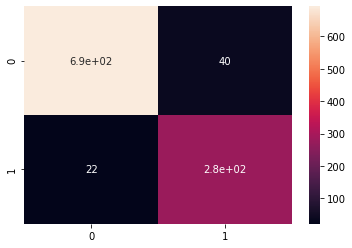

In [27]:
import seaborn as sns
sns.heatmap(cm,annot=True)